In [219]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [171]:
df=pd.read_csv("messages.csv")

In [172]:
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
subject    2831 non-null object
message    2893 non-null object
label      2893 non-null int64
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [174]:
df.dtypes

subject    object
message    object
label       int64
dtype: object

In [175]:
response=Counter(df.label)

In [176]:
response

Counter({0: 2412, 1: 481})

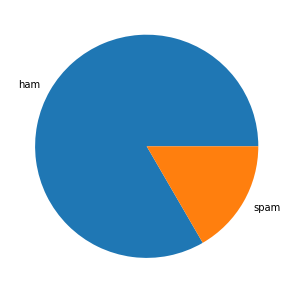

In [177]:
import matplotlib.pyplot as plt
opinion=["ham","spam"]
data=[2412,481]
fig = plt.figure(figsize =(5,7)) 
plt.pie(data, labels = opinion)
plt.show()

In [178]:
data=df.drop(["subject"],axis=1)

In [179]:
data

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0
...,...,...
2888,hello thanks for stopping by ! ! we have taken...,1
2889,"the list owner of : "" kiddin "" has invited you...",1
2890,"judging from the return post , i must have sou...",0
2891,gotcha ! there are two separate fallacies in t...,0


In [180]:
data.label[data.label == 0] = "ham"
data.label[data.label == 1] = "spam"

In [181]:
data

,message,label
0,content - length : 3386 apple-iss research cen...,ham
1,"lang classification grimes , joseph e . and ba...",ham
2,i am posting this inquiry for sergei atamas ( ...,ham
3,a colleague and i are researching the differin...,ham
4,earlier this morning i was on the phone with a...,ham
...,...,...
2888,hello thanks for stopping by ! ! we have taken...,spam
2889,"the list owner of : "" kiddin "" has invited you...",spam
2890,"judging from the return post , i must have sou...",ham
2891,gotcha ! there are two separate fallacies in t...,ham


In [182]:
data=data.rename(columns={"label":"target","message":"text"})

In [183]:
data

,text,target
0,content - length : 3386 apple-iss research cen...,ham
1,"lang classification grimes , joseph e . and ba...",ham
2,i am posting this inquiry for sergei atamas ( ...,ham
3,a colleague and i are researching the differin...,ham
4,earlier this morning i was on the phone with a...,ham
...,...,...
2888,hello thanks for stopping by ! ! we have taken...,spam
2889,"the list owner of : "" kiddin "" has invited you...",spam
2890,"judging from the return post , i must have sou...",ham
2891,gotcha ! there are two separate fallacies in t...,ham


In [184]:
data.target.value_counts()

ham     2412
spam     481
Name: target, dtype: int64

In [185]:
data.groupby('target').describe()

text                                                               
       count unique                                                top freq
target                                                                     
ham     2412   2401  newsletter 1 . workshop on complexity in langu...    2
spam     481    458  this is not spam ; you are receiving this mess...    5

Text(0.5, 1.0, 'Distribution of Spam and Ham')

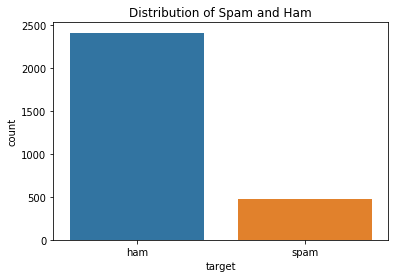

In [186]:
sns.countplot(x = "target", data = data)
data.loc[:, 'target'].value_counts()
plt.title('Distribution of Spam and Ham')

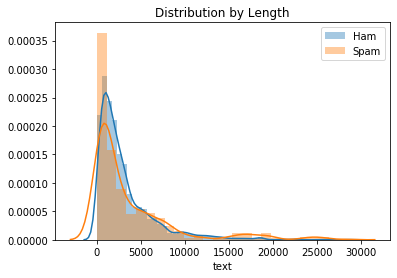

In [187]:
# plotting graph by length.

ham =data[data['target'] == 'ham']['text'].str.len()
sns.distplot(ham, label='Ham')
spam = data[data['target'] == 'spam']['text'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend()

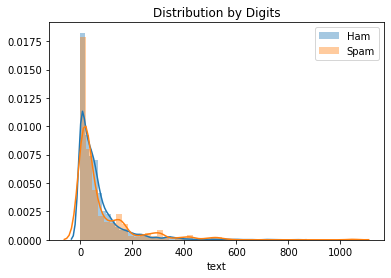

In [188]:
#plotting graph by digits.

ham1 = data[data['target'] == 'ham']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(ham1, label='Ham')
spam1 = data[data['target'] == 'spam']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(spam1, label='Spam')
plt.title('Distribution by Digits')
plt.legend()

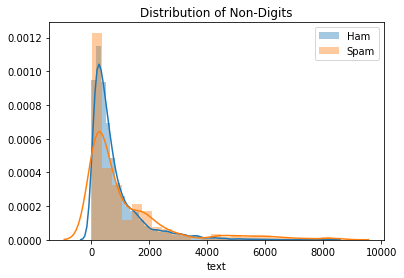

In [189]:
#plotting graph for non-digits.

ham2 = data[data['target'] == 'ham']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(ham2, label='Ham')
spam2 = data[data['target'] == 'spam']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(spam2, label='Spam')
plt.title('Distribution of Non-Digits')
plt.legend()

In [190]:
#for counting frequently occurence of spam and ham.

count1 = Counter(" ".join(data[data['target']=='ham']["text"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(data[data['target']=='spam']["text"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

In [191]:
count2

[('_', 39251),
 ('.', 21351),
 ('*', 19092),
 ('-', 18862),
 (',', 12152),
 ('the', 10159),
 ('=', 9065),
 ('to', 8332),
 ('you', 7805),
 ('and', 6557),
 ('!', 6518),
 ('of', 4825),
 ('/', 4653),
 ('a', 4630),
 ('$', 4423),
 ('for', 3573),
 ('your', 3540),
 ('this', 3237),
 ('is', 3153),
 ('in', 3137),
 ("'", 3080),
 ('i', 2927),
 (':', 2787),
 ('it', 2700),
 ('"', 2661),
 ('+', 2659),
 ('that', 2163),
 ('on', 2142),
 ('will', 2095),
 ('with', 1836)]

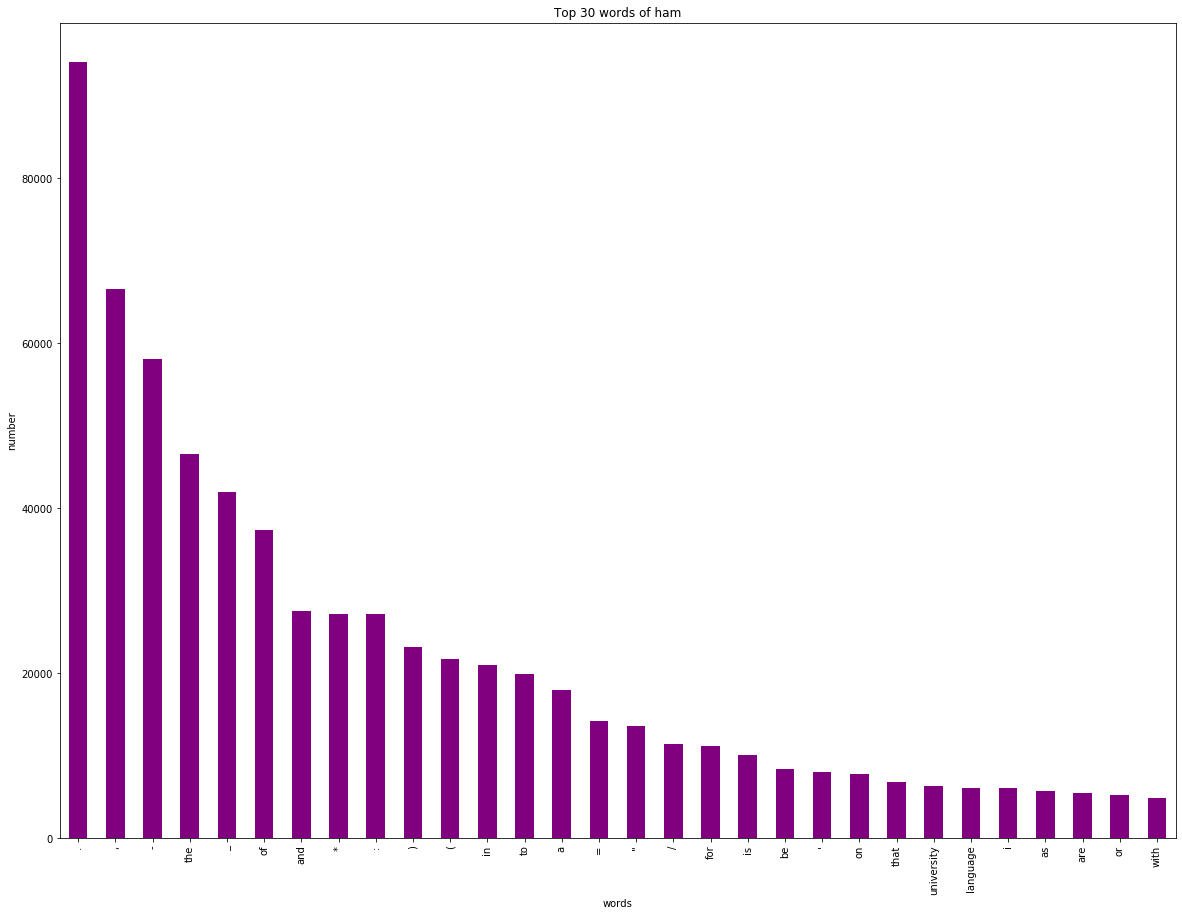

In [192]:
data1.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

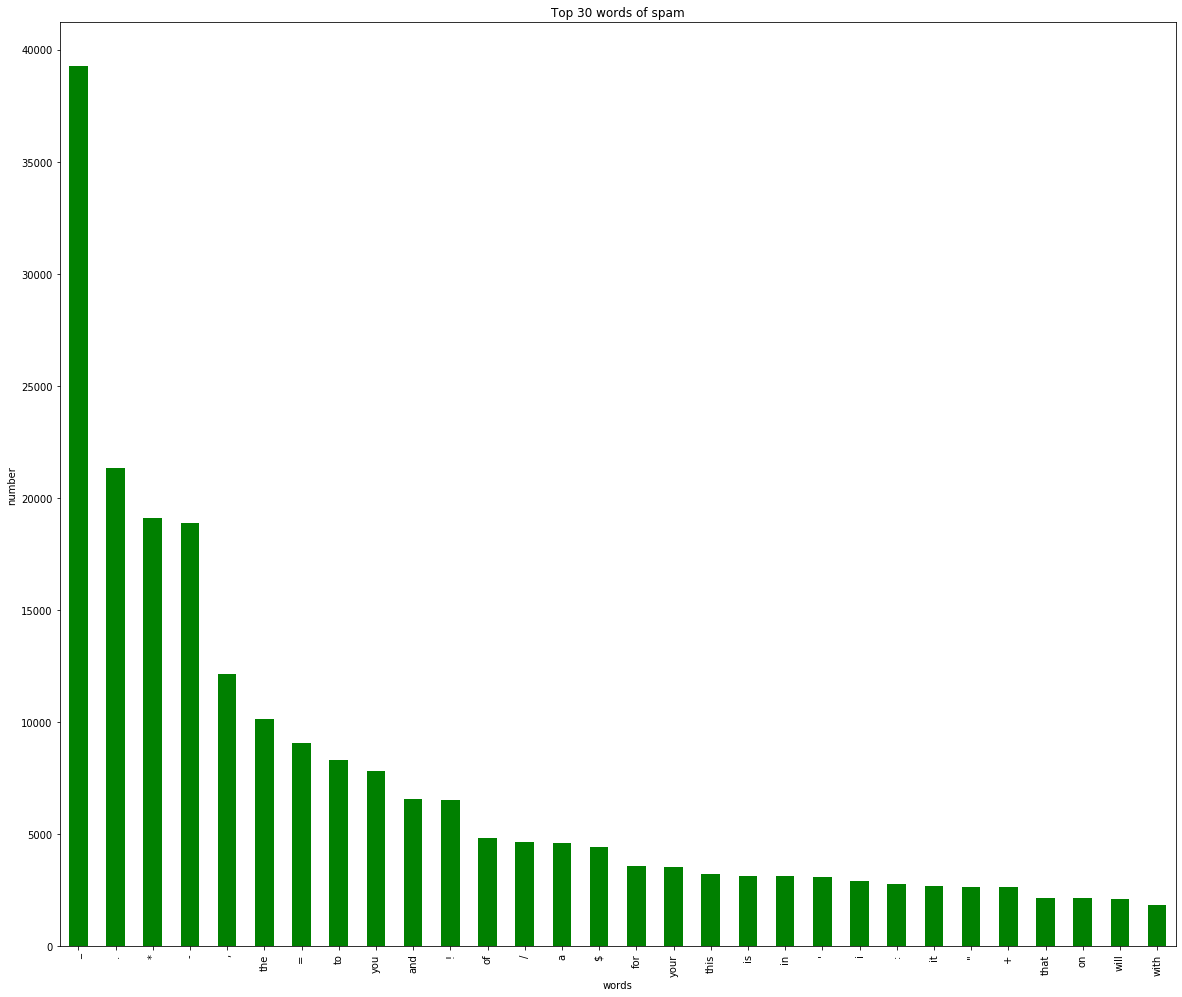

In [193]:
data2.plot.bar(legend = False, color = 'green', figsize = (20,17))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size = 0.3, random_state = 37)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  2025
X_test:  868
y_train:  2025
y_test:  868


In [199]:
corpus = []
for i in range(0, 2893):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [201]:
cv = CountVectorizer(max_features = 600)
cv.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [202]:
X_train_cv = cv.transform(X_train)
X_train_cv

<2025x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 256904 stored elements in Compressed Sparse Row format>

In [203]:
X_test_cv = cv.transform(X_test)
X_test_cv

<868x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 107175 stored elements in Compressed Sparse Row format>

In [204]:
#Naive bayes classification
mnb = MultinomialNB(alpha = 0.5)
mnb.fit(X_train_cv,y_train)

y_mnb = mnb.predict(X_test_cv)

In [205]:
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb , y_test))
print('Naive Bayes confusion_matrix: ', confusion_matrix(y_mnb, y_test))

Naive Bayes Accuracy:  0.9815668202764977
Naive Bayes confusion_matrix:  [[709   5]
 [ 11 143]]


In [206]:
#SVM Classification
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_cv,y_train)
y_svc = svc.predict(X_test_cv)

In [207]:
print('SVM Accuracy: ', accuracy_score( y_svc , y_test))
print('SVM confusion_matrix: ', confusion_matrix(y_svc, y_test))

SVM Accuracy:  0.7799539170506913
SVM confusion_matrix:  [[637 108]
 [ 83  40]]


In [208]:
#KNeighbors Classification
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(X_train_cv,y_train)

y_knc = knc.predict(X_test_cv)

In [209]:
print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_knc))
print('KNeighbors confusion_matrix: ', confusion_matrix(y_test, y_knc)) 

KNeighbors Accuracy_score:  0.8882488479262672
KNeighbors confusion_matrix:  [[720   0]
 [ 97  51]]


In [210]:
#Decision tree Classification
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)

In [211]:
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)

In [212]:
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_dtc))
print('Decision Tree confusion_matrix: ', confusion_matrix(y_dtc, y_test))

Decision Tree Accuracy:  0.967741935483871
Decision Tree confusion_matrix:  [[711  19]
 [  9 129]]


In [213]:
#Random Forest Classification
rfc = RandomForestClassifier(n_estimators=37, random_state=252)
rfc.fit(X_train_cv,y_train)
y_rfc = rfc.predict(X_test_cv)

In [214]:
print('Random Forest Accuracy_score: ',accuracy_score(y_test,y_rfc))
print('Random Forest confusion_matrix: ', confusion_matrix(y_rfc, y_test))

Random Forest Accuracy_score:  0.978110599078341
Random Forest confusion_matrix:  [[718  17]
 [  2 131]]


In [215]:
#Ada-Boosting Classification
abc = AdaBoostClassifier(n_estimators=37, random_state=252)
abc.fit(X_train_cv,y_train)
y_abc = abc.predict(X_test_cv)

In [216]:
print('AdaBoost Accuracy_score: ',accuracy_score(y_test,y_abc))
print('AdaBoost confusion_matrix: ', confusion_matrix(y_abc, y_test)) 

AdaBoost Accuracy_score:  0.9804147465437788
AdaBoost confusion_matrix:  [[716  13]
 [  4 135]]


In [217]:
#Bagging Classification
bc = BaggingClassifier(n_estimators=9, random_state=252)
bc.fit(X_train_cv,y_train)
y_bc = bc.predict(X_test_cv)

In [218]:
print('Bagging Accuracy_score: ',accuracy_score(y_test,y_bc))
print('Bagging confusion_matrix: ', confusion_matrix(y_bc, y_test)) 

Bagging Accuracy_score:  0.967741935483871
Bagging confusion_matrix:  [[710  18]
 [ 10 130]]
